In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

Mounted at /content/drive


In [4]:
train=pd.read_csv('/content/drive/MyDrive/ML/머신러닝 특강/train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 이상치 탐지

In [25]:
out=[]

# 매개변수로 지정해준 name은 데이터프레임의 특정 열이다.
def iqr_outlier(name):
  q1= name.quantile(0.25)
  q3= name.quantile(0.75)
  iqr= q3-q1
  lower= q1-1.5*iqr # 하한 임계값
  upper= q3+1.5*iqr # 상한 임계값

  for i in name:
    if i > upper or i < lower:
      out.append(i)
  return print(f'이상치는{out}')

In [22]:
iqr_outlier(train['LotFrontage'])

이상치는[112.0, 115.0, 24.0, 21.0, 121.0, 122.0, 24.0, 120.0, 134.0, 141.0, 24.0, 24.0, 174.0, 21.0, 21.0, 174.0, 21.0, 21.0, 120.0, 129.0, 140.0, 120.0, 118.0, 116.0, 150.0, 21.0, 130.0, 21.0, 24.0, 21.0, 137.0, 21.0, 21.0, 24.0, 130.0, 24.0, 21.0, 21.0, 21.0, 120.0, 24.0, 24.0, 144.0, 114.0, 24.0, 21.0, 128.0, 116.0, 149.0, 21.0, 313.0, 24.0, 24.0, 24.0, 122.0, 130.0, 121.0, 21.0, 115.0, 21.0, 21.0, 21.0, 120.0, 24.0, 24.0, 24.0, 114.0, 168.0, 182.0, 134.0, 24.0, 120.0, 118.0, 138.0, 160.0, 24.0, 152.0, 21.0, 124.0, 21.0, 313.0, 24.0, 153.0, 120.0, 129.0, 124.0, 21.0, 21.0]


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='LotFrontage'>

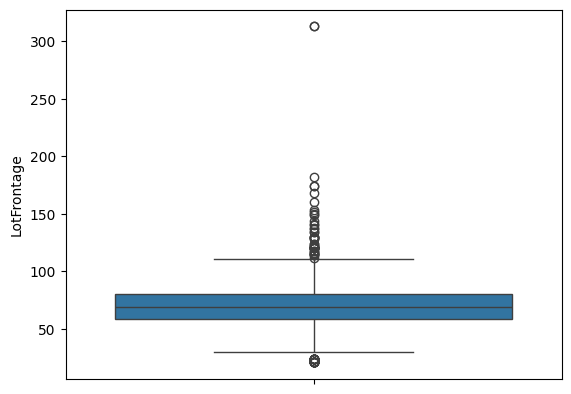

In [24]:
sns.boxplot(train['LotFrontage'])

# 이상치를 제거

In [28]:
# df: 데이터 프레임
# name: 열 이름

def drop_outliers(df, name):
  q1= df[name].quantile(0.25)
  q3= df[name].quantile(0.75)
  iqr= q3-q1
  lower= q1-1.5*iqr
  upper= q3+1.5*iqr

  df.drop(df [ df[name]>upper].index, inplace=True)
  df.drop(df [ df[name]<lower].index, inplace=True)
  # 특정 조건을 만족하는 데이터 프레임이 되도록 drop함수 사용.
  # .drop()은 숫자를 매개변수로 받기 때문에 .index를 써서 숫자로 변환.
  # 원본을 대체하는 inplace를 트루. 이걸 안 하면 코드 작동할 때만 변환상태



In [30]:
drop_outliers(train, 'LotFrontage')

<Axes: ylabel='LotFrontage'>

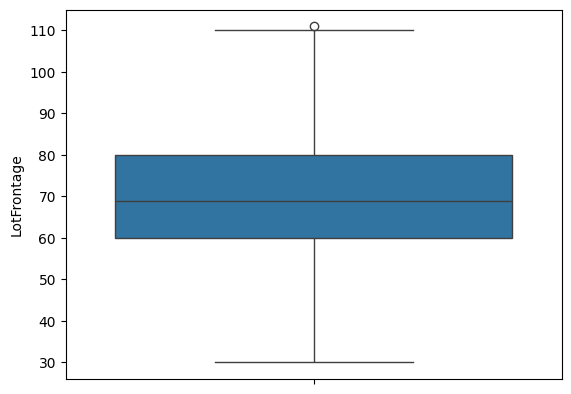

In [31]:
sns.boxplot(train['LotFrontage'])

# 결측치
- 이상치를 제거하면서 결측치가 생겨버림;

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1372 non-null   int64  
 1   MSSubClass     1372 non-null   int64  
 2   MSZoning       1372 non-null   object 
 3   LotFrontage    1113 non-null   float64
 4   LotArea        1372 non-null   int64  
 5   Street         1372 non-null   object 
 6   Alley          84 non-null     object 
 7   LotShape       1372 non-null   object 
 8   LandContour    1372 non-null   object 
 9   Utilities      1372 non-null   object 
 10  LotConfig      1372 non-null   object 
 11  LandSlope      1372 non-null   object 
 12  Neighborhood   1372 non-null   object 
 13  Condition1     1372 non-null   object 
 14  Condition2     1372 non-null   object 
 15  BldgType       1372 non-null   object 
 16  HouseStyle     1372 non-null   object 
 17  OverallQual    1372 non-null   int64  
 18  OverallCond  

1460개-> 1372개

In [36]:
train.isnull()
# 트루: 결측치

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [39]:
train.isnull().sum()
# 컬럼별 결측치 개수

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [41]:
# fillna(): 결측치를 무엇으로 채울지
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
# 여기선 민값으로 대체하기로 함

In [42]:
train.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


올ㅋ LotFrontage 컬럼의 결측치가 0개로 바뀌었다

In [44]:
train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [47]:
train['GarageFinish']=train['GarageFinish'].fillna('Unkwnon')
# GarageFinish 컬럼의 nan 값을 fillna로 Unknown으로 변경. 근데 뭐.. 의미있나 ㅋㅋ

In [46]:
train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'Unkwnon'], dtype=object)

그래 뭐 일단 변경하긴 했음.

근데 변경하지말고 그냥 아싸리 다 지워버리자

In [54]:
# dropna 함수의 매개변수axis: 특정 축을 기준으로 봤을 때 결측치가 있다면, 그 행이나 열을 제거
train.dropna(axis=1, inplace=False) # 이번에는 원본데이터 남겨두려고 inplace는 false.
# 참고로 axis=0이면, 피쳐 중 결칙치가 있는 행을 모두 제거.

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1372 non-null   int64  
 1   MSSubClass     1372 non-null   int64  
 2   MSZoning       1372 non-null   object 
 3   LotFrontage    1372 non-null   float64
 4   LotArea        1372 non-null   int64  
 5   Street         1372 non-null   object 
 6   Alley          84 non-null     object 
 7   LotShape       1372 non-null   object 
 8   LandContour    1372 non-null   object 
 9   Utilities      1372 non-null   object 
 10  LotConfig      1372 non-null   object 
 11  LandSlope      1372 non-null   object 
 12  Neighborhood   1372 non-null   object 
 13  Condition1     1372 non-null   object 
 14  Condition2     1372 non-null   object 
 15  BldgType       1372 non-null   object 
 16  HouseStyle     1372 non-null   object 
 17  OverallQual    1372 non-null   int64  
 18  OverallCond  